In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

# Arguments

In [4]:
corr = 0.25

# Load Meta-RL results

In [5]:
model_name, path_to_pkl, eval_dset_path = configs.get_model_paths(corr, "darkroom_simple")

epoch=13-val_loss=0.911523.ckpt


In [6]:
path_to_pkl = os.path.join(os.path.dirname(path_to_pkl), 'eval_results_offline_by_query_type.pkl')

In [7]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
metarl_df = pd.DataFrame(data)
metarl_df.head()

,model,return,environment,experienced_reward,context_length,query_type,path_length_scaled,returns_scaled
0,Opt,12.000000,0,13,200,seen_states_pre_reward,0.032217,0.967783
1,Learner (temp=2),0.945833,0,13,200,seen_states_pre_reward,0.923720,0.076280
2,Learner (temp=1),0.975000,0,13,200,seen_states_pre_reward,0.921368,0.078632
3,Learner (greedy),1.000000,0,13,200,seen_states_pre_reward,0.919351,0.080649
4,Opt,12.100000,0,13,200,seen_states_pre_and_post_reward,0.024152,0.975848


# Plot all results

In [8]:
# Concatenate the dataframes
df = metarl_df


In [9]:
np.unique(df['context_length'])

array([200])

In [10]:
np.unique(df['query_type'])

array(['seen_states_post_reward', 'seen_states_pre_and_post_reward',
       'seen_states_pre_reward', 'unseen_states'], dtype=object)

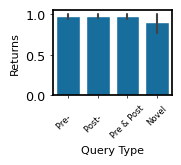

In [ ]:
# Create bar plot
plt.figure(figsize=(2, 1.75))
sns.barplot(
    data=df[df['model']=='Learner (greedy)'],
    x='query_type', y='return',
    order=['seen_states_pre_reward', 'seen_states_post_reward', 'seen_states_pre_and_post_reward', 'unseen_states'],
    legend=None)
plt.xticks(
    [0,1,2,3], ['Pre-     ', 'Post-     ', 'Pre & Post', 'Novel'],
    fontsize=6, rotation=45)
plt.xlabel('Query Type', fontsize=8)
plt.ylabel('Returns', fontsize=8)
plt.tight_layout()
plt.savefig('figs_app/D_13a.png', transparent=True, dpi=300)
plt.savefig('figs_app/D_13a.pdf', transparent=True, dpi=300)
plt.show()
